In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [4]:
df = pd.read_csv('train2.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#Nice way to display missing values!
display(((df.isnull().sum() / df.shape[0])*100).to_frame().rename({0: 'Missing Values % (Train)'}, axis = 1).style.background_gradient('gist_heat_r'))

#Use the encoding schemes to encode “nan” as just another value. This is one possible and quite reasonable approach to
#handling missing values for categorical variables.

,Missing Values % (Train)
PassengerId,0.000000
HomePlanet,2.312205
CryoSleep,2.496261
Cabin,2.289198
Destination,2.093639
Age,2.059128
VIP,2.335212
RoomService,2.082135
FoodCourt,2.105142
ShoppingMall,2.392730


In [7]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
df.loc[(df['CryoSleep'] == 1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,9267_02,Europa,True,E/607/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Sabi Opshaft,True
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [8]:
df['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [10]:
df.groupby('HomePlanet').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,,,,,,,
Earth,26.068232,136.940209,137.228857,133.872606,142.781701,138.132933,0.423946
Europa,34.419664,145.231981,1503.212950,151.132820,848.055609,875.765998,0.658846
Mars,29.297203,552.897272,54.361999,308.445734,110.221706,47.440698,0.523024


In [11]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
for i in range(0,80):
    percentage_teletransported = df.loc[(df['Transported'] == 1) & (df['Age'] == i), 'Age'].value_counts()/df.loc[df['Age']==i, 'Age'].value_counts()
    print(percentage_teletransported)
#0-18 anos: porcentagem maior que 50%
#as crianças foram mais teletransportadas, porém não há uma relação linear entre a idade e a porcentagem teletransportada

0.0    0.808989
Name: Age, dtype: float64
1.0    0.731343
Name: Age, dtype: float64
2.0    0.706667
Name: Age, dtype: float64
3.0    0.786667
Name: Age, dtype: float64
4.0    0.746479
Name: Age, dtype: float64
5.0    0.606061
Name: Age, dtype: float64
6.0    0.575
Name: Age, dtype: float64
7.0    0.615385
Name: Age, dtype: float64
8.0    0.565217
Name: Age, dtype: float64
9.0    0.571429
Name: Age, dtype: float64
10.0    0.641026
Name: Age, dtype: float64
11.0    0.574468
Name: Age, dtype: float64
12.0    0.707317
Name: Age, dtype: float64
13.0    0.510638
Name: Age, dtype: float64
14.0    0.557971
Name: Age, dtype: float64
15.0    0.587097
Name: Age, dtype: float64
16.0    0.544218
Name: Age, dtype: float64
17.0    0.563291
Name: Age, dtype: float64
18.0    0.5
Name: Age, dtype: float64
19.0    0.47099
Name: Age, dtype: float64
20.0    0.454874
Name: Age, dtype: float64
21.0    0.405145
Name: Age, dtype: float64
22.0    0.457045
Name: Age, dtype: float64
23.0    0.469178
Name: Age, dt

In [13]:
d0 = (df.loc[df['Transported']== 0, 'Destination'].value_counts())/df['Destination'].value_counts()
d1 = (df.loc[df['Transported']== 1, 'Destination'].value_counts())/df['Destination'].value_counts()
d0, d1
#não existe uma relação forte entre as pessoas que foram teletransportadas e as destinações

(TRAPPIST-1e      0.528825
 55 Cancri e      0.390000
 PSO J318.5-22    0.496231
 Name: Destination, dtype: float64,
 TRAPPIST-1e      0.471175
 55 Cancri e      0.610000
 PSO J318.5-22    0.503769
 Name: Destination, dtype: float64)

In [14]:
c0 = df.loc[(df['Transported'] == 0), 'CryoSleep'].value_counts()/df['CryoSleep'].value_counts()
c1 = df.loc[(df['Transported'] == 1), 'CryoSleep'].value_counts()/df['CryoSleep'].value_counts()
c0, c1
#das pessoas que foram teletransportadas, mais de 80% estavam em CryoSleep

(False    0.671079
 True     0.182417
 Name: CryoSleep, dtype: float64,
 False    0.328921
 True     0.817583
 Name: CryoSleep, dtype: float64)

In [15]:
hp0 = df.loc[(df['Transported'] == 0), 'HomePlanet'].value_counts()/df['HomePlanet'].value_counts()
hp1 = df.loc[(df['Transported'] == 1), 'HomePlanet'].value_counts()/df['HomePlanet'].value_counts()
hp0, hp1
#não existe relação forte entre os planetas de origem e o teletransporte

(Earth     0.576054
 Europa    0.341154
 Mars      0.476976
 Name: HomePlanet, dtype: float64,
 Earth     0.423946
 Europa    0.658846
 Mars      0.523024
 Name: HomePlanet, dtype: float64)

In [16]:
vip0 = df.loc[(df['Transported'] == 0), 'VIP'].value_counts()/df['VIP'].value_counts()
vip1 = df.loc[(df['Transported'] == 1), 'VIP'].value_counts()/df['VIP'].value_counts()
vip0, vip1
#não existe relação forte entre classe vip e o teletransporte

(False    0.493668
 True     0.618090
 Name: VIP, dtype: float64,
 False    0.506332
 True     0.381910
 Name: VIP, dtype: float64)

In [17]:
df.groupby('HomePlanet').agg({"Age":"mean"})

,Age
HomePlanet,
Earth,26.068232
Europa,34.419664
Mars,29.297203


### K MEANS CLUSTERING NOS DADOS

In [12]:
#vamos clusterizar os gastos

x_cluster = df.loc[:, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
x_cluster

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(x_cluster)
x_cluster_new = imputer.transform(x_cluster)

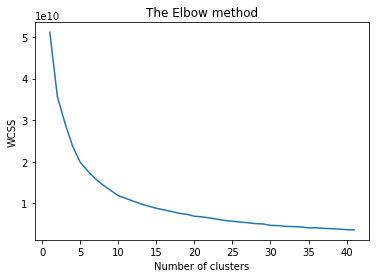

In [14]:
wcss = []
for i in range(1,42):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) #usar o kmeans ++ ajuda na inicialização dos centroides, pois
    #ele não coloca em lugares muito aleatorios, o que pode gerar problemas
    kmeans.fit(x_cluster_new)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,42), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
model_kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
df['Cluster']= model_kmeans.fit_predict(x_cluster_new)
df['Cluster'] = df['Cluster'].astype("category")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cluster
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0


In [16]:
df.dtypes, df.isnull().sum()

(PassengerId       object
 HomePlanet        object
 CryoSleep         object
 Cabin             object
 Destination       object
 Age              float64
 VIP               object
 RoomService      float64
 FoodCourt        float64
 ShoppingMall     float64
 Spa              float64
 VRDeck           float64
 Name              object
 Transported         bool
 Cluster         category
 dtype: object,
 PassengerId       0
 HomePlanet      201
 CryoSleep       217
 Cabin           199
 Destination     182
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 Cluster           0
 dtype: int64)

In [17]:
df.loc[(df['CryoSleep'] == 1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cluster
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,0
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True,0
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,9267_02,Europa,True,E/607/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Sabi Opshaft,True,0
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True,0
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True,0
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True,0


In [20]:
df['CryoSleep'] = df['CryoSleep'].fillna(df.groupby('Cluster')['CryoSleep'].transform('mean'))


In [34]:
df.head(50)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cluster
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0


In [21]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Cluster           0
dtype: int64

### Processamento dos dados

In [22]:
#Vou começar excluindo a cabine e as colunas nome, passengerid e transformando os outros dados categóricos em numéricos
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Separate target from predictors
y = df.Transported
X = df.drop(['Transported', 'VIP', 'PassengerId'], axis=1)

# Divide data into training and validation subsets
#Divindo antes, não corre risco de "vazar" informações dos dados de treino pros de teste e causar overfitting 
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 12 and 
                        X_train_full[cname].dtype.name in ["object", "category"]] #tive que acrescentar dtype.NAME aqui pra pegar
                                                                                #a porcaria da categoria

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy() #dados que serão usados pra validação

categorical_cols

['HomePlanet', 'CryoSleep', 'Destination', 'Cluster']

In [24]:
X_train.groupby('HomePlanet').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
HomePlanet,,,,,,
Earth,25.972391,134.894010,137.565662,132.621149,145.012725,134.066944
Europa,34.566707,150.013134,1498.268953,165.445383,861.945542,883.544478
Mars,29.391722,546.857352,59.283419,308.885150,106.081871,44.545922


In [25]:
X_train.groupby('CryoSleep').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,,
False,29.662973,347.055107,714.863248,272.176525,494.664353,475.453158
0.43503796017762497,26.787234,116.121429,125.258993,98.416058,106.554745,104.619403
True,27.401200,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
X_train.groupby('Destination').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Destination,,,,,,
55 Cancri e,29.261821,196.804059,854.459479,163.203966,483.190409,513.670205
PSO J318.5-22,27.413183,81.394822,118.172303,107.713826,102.661836,143.160772
TRAPPIST-1e,28.857019,251.292268,383.930157,189.069929,290.779716,263.812527


In [27]:
X_train.isnull().sum()

HomePlanet      168
CryoSleep         0
Destination     139
Cluster           0
Age             148
RoomService     126
FoodCourt       140
ShoppingMall    165
Spa             134
VRDeck          151
dtype: int64

In [28]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Random Forest

In [1]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model',RandomForestClassifier(random_state=42, n_estimators=2000))
                             ])

#rf_params = { 'model__n_estimators': [50, 100, 500, 1000, 1500, 2000]} #o parametro tem que vir com o nome do modelo usado na
#pipeline (neste caso, model)

#rf_cv = GridSearchCV(rf_pipeline, param_grid=rf_params, n_jobs = -1, cv=10)
#rf_cv.fit(X_train, y_train)
#rf_cv.best_params_

NameError: name 'Pipeline' is not defined

In [139]:
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_valid)
acc_rf = accuracy_score(y_valid, rf_preds)
acc_rf

0.7797584818861415

In [140]:
accuraciesrf = cross_val_score(estimator=rf_pipeline, X=X_train, y=y_train, cv=10)
print("Accuracies: {:.2f}%" .format(accuraciesrf.mean()*100))
print("Standar deviation: {:.2f}%" .format(accuraciesrf.std()*100))

Accuracies: 78.72%
Standar deviation: 1.14%


### XGB 

In [29]:
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model',XGBClassifier())
                             ])

xgb_pipeline.fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_valid)
acc_xgb = accuracy_score(y_valid, xgb_preds)
acc_xgb

C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7843588269120184

In [30]:
accuraciesxgb = cross_val_score(estimator=xgb_pipeline, X=X_train, y=y_train, cv=10)
print("Accuracies: {:.2f}%" .format(accuraciesxgb.mean()*100))
print("Standar deviation: {:.2f}%" .format(accuraciesxgb.std()*100))

C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\naomy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracies: 79.00%
Standar deviation: 1.00%


### LGBM 

In [ ]:
lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model',LGBMClassifier())
                             ])

lgbm_pipeline.fit(X_train, y_train)
lgbm_preds = lgbm_pipeline.predict(X_valid)
acc_lgbm = accuracy_score(y_valid, lgbm_preds)
acc_lgbm

In [32]:
accuracieslgbm = cross_val_score(estimator=lgbm_pipeline, X=X_train, y=y_train, cv=10)
print("Accuracies: {:.2f}%" .format(accuracieslgbm.mean()*100))
print("Standar deviation: {:.2f}%" .format(accuracieslgbm.std()*100))

Accuracies: 79.34%
Standar deviation: 1.39%


### Implementando o melhor modelo nos dados de teste

In [244]:
#best model will be LGBMClassifier. Adjusting the test dataset to predict teletransport

df2 = pd.read_csv('test2.csv')
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [248]:
df2.shape

(4277, 13)

In [359]:
x_cluster2 = df2.loc[:, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
x_cluster_new2 = imputer.transform(x_cluster2)
df2['Cluster']= model_kmeans.fit_predict(x_cluster_new2)
df2['Cluster'] = df2['Cluster'].astype("category")
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cluster
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0


In [368]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)

X = df2.drop(['PassengerId', 'VIP'], axis=1)
categorical_cols2 = [cname for cname in X.columns if X[cname].nunique() < 12 and 
                        X[cname].dtype.name in ["object", "category"]]

# Select numerical columns
numerical_cols2 = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols2 = categorical_cols2 + numerical_cols2
X_test = df2[my_cols2].copy()
X_test.head()

,HomePlanet,CryoSleep,Destination,Cluster,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,0,27.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,2,19.0,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,0,31.0,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,1,38.0,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,0,20.0,10.0,0.0,635.0,0.0,0.0


In [364]:
predictions = lgbm_pipeline.predict(X_test)
predictions

array([ True, False,  True, ...,  True,  True,  True])

In [365]:
#matrix_aux = np.vstack([df2['PassengerId'].values,predictions])
#matrix     = np.transpose(matrix_aux)
#df_matrix = pd.DataFrame(matrix)
#np.savetxt('titanic_spaceship_naomy.csv', df_matrix, fmt="%s", delimiter=',', header='PassengerId,Transported')

In [366]:
df_pred = pd.DataFrame(list(zip(df2["PassengerId"], predictions)),
               columns =['PassengerId', 'Transported'])

df_pred.to_csv("titanic_spaceship_naomy4.csv", index = False)

In [ ]:
#score de 0.79144 foi conseguido com LGBMBooster e tirando a coluna VIP
#score de 0.79167 foi conseguido com LGBMBooster, sem a coluna VIP e com a coluna Cluster para os gastos
#Considerar o sobrenome não melhorou
